In [1]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import pandas as pd
import numpy as np
import re
from plotnine import *

In [5]:
%pwd

'C:\\pandas_practice\\Pandas Analysis'

In [21]:
shop1 = pd.read_csv('01.csv', encoding='cp949')
shop1.shape

(476183, 39)

In [22]:
shop1.head(1)

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
0,28523551,엘가커피부산아시아드점,부산아시아드점,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,I56220,...,2647010100111980000009422,부산아시아드주경기장노외주차장,부산광역시 연제구 종합운동장로 7,611070,47500.0,NaN,1,NaN,129.062034,35.191284


In [23]:
shop1.tail(1)

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
476182,16154269,서울부동산공인중개사사무소,NaN,L,부동산,L01,부동산중개,L01A01,부동산중개,L68221,...,1120011300104280000010286,옥수동극동아파트,서울특별시 성동구 독서당로 187,133766,4732.0,NaN,NaN,247,127.011869,37.542674


In [24]:
shop1.columns

Index(['상가업소번호', '상호명', '지점명', '상권업종대분류코드', '상권업종대분류명', '상권업종중분류코드',
       '상권업종중분류명', '상권업종소분류코드', '상권업종소분류명', '표준산업분류코드', '표준산업분류명', '시도코드',
       '시도명', '시군구코드', '시군구명', '행정동코드', '행정동명', '법정동코드', '법정동명', '지번코드',
       '대지구분코드', '대지구분명', '지번본번지', '지번부번지', '지번주소', '도로명코드', '도로명', '건물본번지',
       '건물부번지', '건물관리번호', '건물명', '도로명주소', '구우편번호', '신우편번호', '동정보', '층정보',
       '호정보', '경도', '위도'],
      dtype='object')

In [25]:
shop1 = shop1[['상호명','지점명','상권업종대분류코드','상권업종중분류명','상권업종소분류명','시도명','시군구명','행정동명','법정동명','지번주소','경도','위도']]

In [26]:
shop1.head()

,상호명,지점명,상권업종대분류코드,상권업종중분류명,상권업종소분류명,시도명,시군구명,행정동명,법정동명,지번주소,경도,위도
0,엘가커피부산아시아드점,부산아시아드점,Q,커피점/카페,커피전문점/카페/다방,부산광역시,연제구,거제2동,거제동,부산광역시 연제구 거제동 1208,129.062034,35.191284
1,비비안아울렛중계점,아울렛중계점,D,의복의류,셔츠/내의/속옷,서울특별시,노원구,중계2.3동,중계동,서울특별시 노원구 중계동 509,127.067888,37.641280
2,연세정신건강의학과의원,NaN,S,병원,기타병원,서울특별시,종로구,창신1동,창신동,서울특별시 종로구 창신동 297,127.014500,37.573196
3,독일지멘스보청기은평점,은평점,D,의약/의료품소매,보청기판매,서울특별시,은평구,불광1동,불광동,서울특별시 은평구 불광동 281-108,126.929871,37.610888
4,서울모드,NaN,Q,커피점/카페,커피전문점/카페/다방,서울특별시,강남구,신사동,신사동,서울특별시 강남구 신사동 517-27,127.022212,37.519315


In [27]:
shop1.isnull().sum()

상호명               1
지점명          416061
상권업종대분류코드         0
상권업종중분류명          0
상권업종소분류명          0
시도명               0
시군구명              0
행정동명              0
법정동명              0
지번주소              0
경도                0
위도                0
dtype: int64

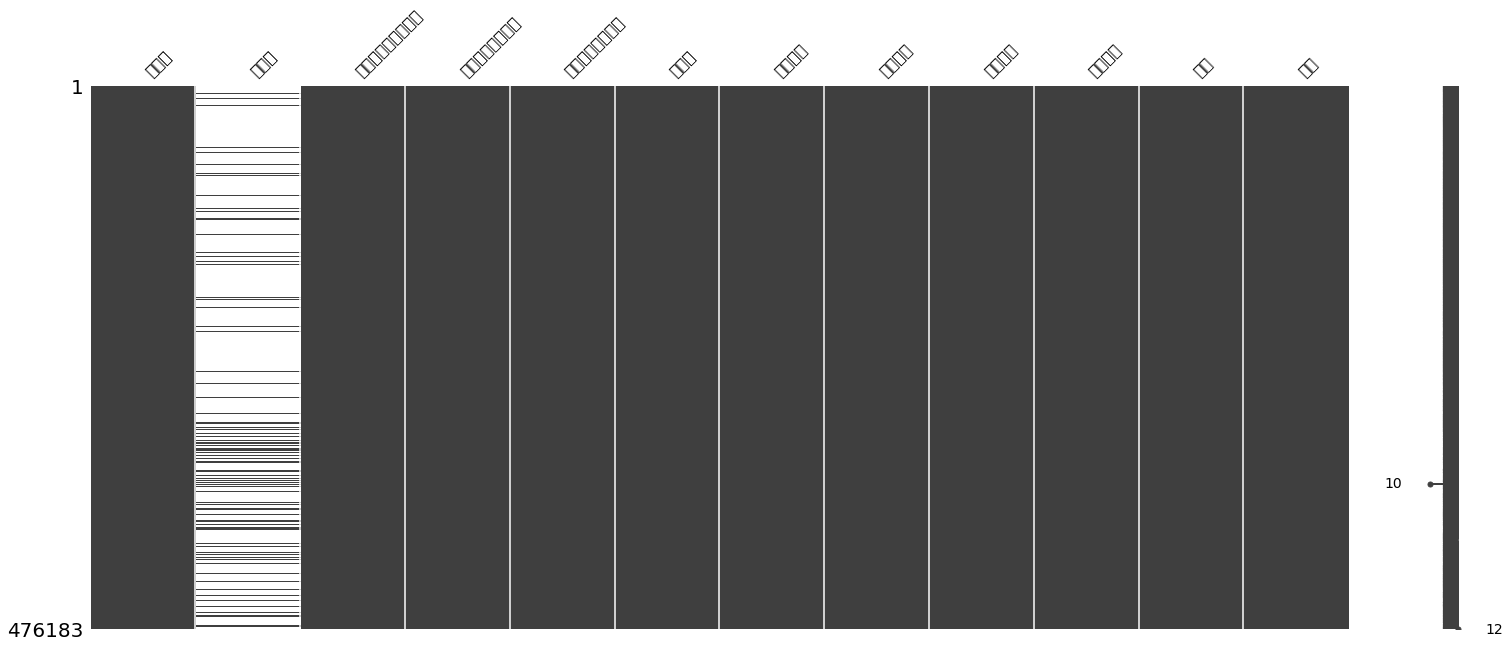

In [28]:
import missingno as msno
msno.matrix(shop1)

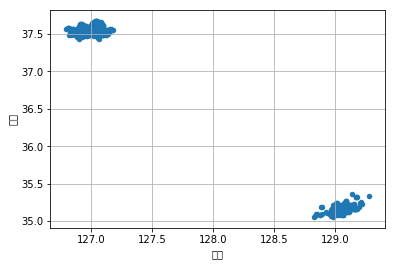

In [29]:
shop1[:1000].plot.scatter(x='경도', y='위도', grid=True)
# 앞에 1000개 데이터는 부산과 서울뿐일것으로 추측

In [32]:
shop_seoul = shop1.loc[shop1['지번주소'].str.startswith('서울')]
shop_except_seoul = shop1.loc[~shop1['지번주소'].str.startswith('서울')]
print(shop_seoul.shape)
print(shop_except_seoul.shape)

(330089, 12)
(146094, 12)


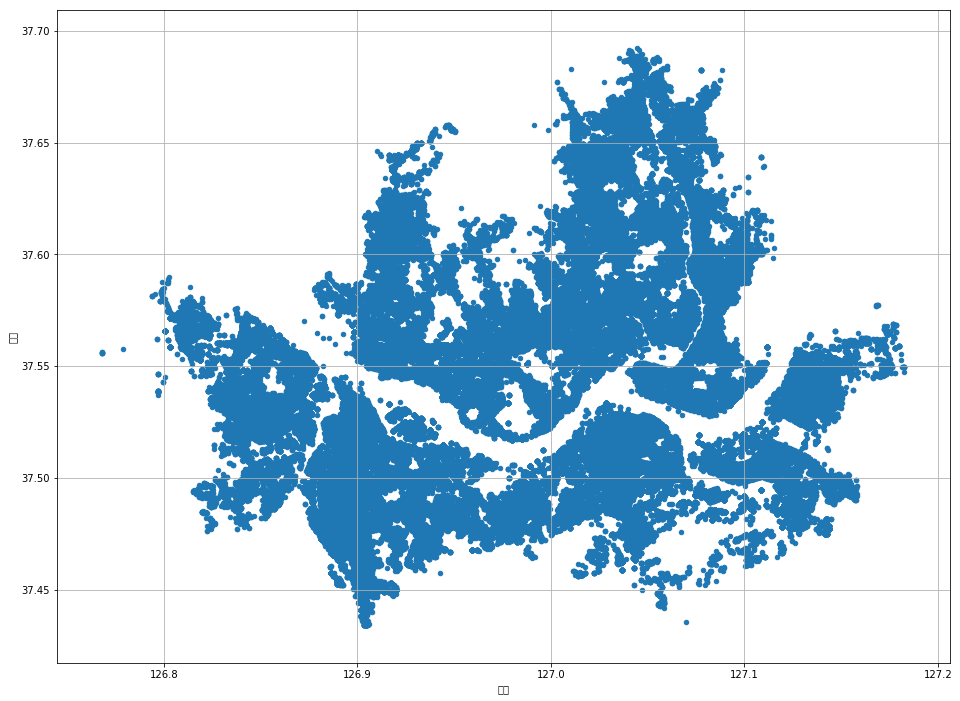

In [33]:
# Pandas 의 plot 으로 위도와 경도를 산점도로 그려봅니다.
# 그래프가 너무 찌그러져 보이지 않도록 그래프 사이즈를 figsize=(16, 12) 로 조정합니다.
shop_seoul.plot.scatter(x='경도', y='위도', figsize=(16, 12), grid=True)

In [34]:
shop1['지번주소'].head()

0       부산광역시 연제구 거제동 1208
1        서울특별시 노원구 중계동 509
2        서울특별시 종로구 창신동 297
3    서울특별시 은평구 불광동 281-108
4     서울특별시 강남구 신사동 517-27
Name: 지번주소, dtype: object

In [36]:
print(shop1.shape)
shop1['시도'] = shop1['지번주소'].str.split(' ', expand=True)[0]
shop1['구군'] = shop1['지번주소'].str.split(' ', expand=True)[1]
print(shop1.shape)
shop1.columns

(476183, 12)
(476183, 14)


Index(['상호명', '지점명', '상권업종대분류코드', '상권업종중분류명', '상권업종소분류명', '시도명', '시군구명',
       '행정동명', '법정동명', '지번주소', '경도', '위도', '시도', '구군'],
      dtype='object')

In [37]:
shop_seoul = shop1.loc[shop1['지번주소'].str.startswith('서울')]
shop_seoul.shape

(330089, 14)

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

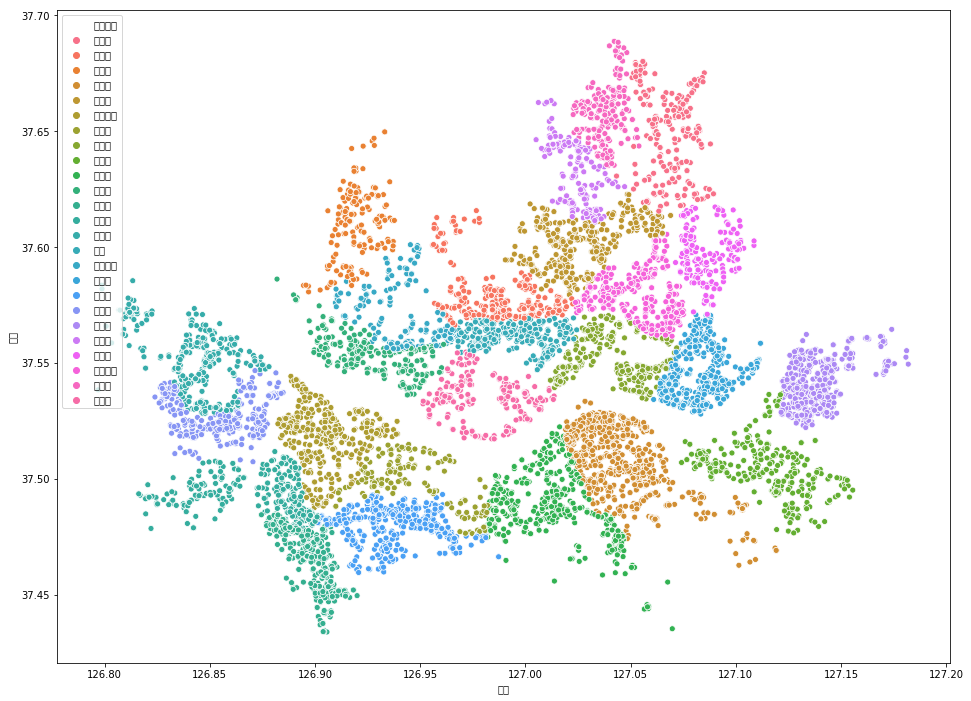

In [42]:
plt.figure(figsize=(16, 12))
sns.scatterplot(data=shop_seoul[:10000], x='경도', y='위도', hue='시군구명')

In [47]:
# 상권업종대분류명을 빼먹어서 컬럼 추가하기
shop_plus = pd.read_csv('01.csv', encoding='cp949')
shop_plus = shop_plus['상권업종대분류명']
# shop_plus.head()

In [48]:
shop_seoul['상권업종대분류명'] = shop_plus

In [49]:
shop_seoul.columns

Index(['상호명', '지점명', '상권업종대분류코드', '상권업종중분류명', '상권업종소분류명', '시도명', '시군구명',
       '행정동명', '법정동명', '지번주소', '경도', '위도', '시도', '구군', '상권업종대분류명'],
      dtype='object')

In [50]:
shop_seoul['상권업종대분류명'].value_counts()

음식          109766
소매          101297
생활서비스        52728
학문/교육        26294
의료           15144
부동산          12905
관광/여가/오락      9165
숙박            2744
스포츠             46
Name: 상권업종대분류명, dtype: int64

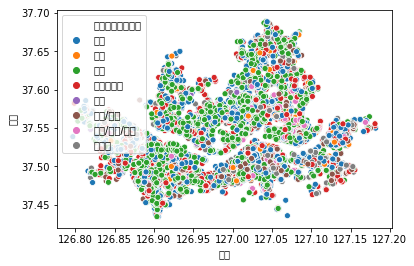

In [51]:
sns.scatterplot(data=shop_seoul[:10000], x='경도', y='위도', hue='상권업종대분류명')

In [52]:
shop_seoul_edu = shop_seoul[shop_seoul['상권업종대분류명'] == '학문/교육']
shop_seoul_edu.head()

,상호명,지점명,상권업종대분류코드,상권업종중분류명,상권업종소분류명,시도명,시군구명,행정동명,법정동명,지번주소,경도,위도,시도,구군,상권업종대분류명
72,GIA보석교육원,NaN,R,학원-자격/국가고시,학원-보석감정,서울특별시,강남구,압구정동,신사동,서울특별시 강남구 신사동 639-3,127.036437,37.528532,서울특별시,강남구,학문/교육
103,정아트,NaN,R,학원-음악미술무용,서예/서화/미술,서울특별시,강서구,염창동,염창동,서울특별시 강서구 염창동 184-8,126.873645,37.550924,서울특별시,강서구,학문/교육
113,안재형영어,NaN,R,학원-어학,학원-외국어/어학,서울특별시,양천구,목5동,목동,서울특별시 양천구 목동 905-34,126.875973,37.531592,서울특별시,양천구,학문/교육
127,삼익피아노강동대리점,강동대리점,R,학원-음악미술무용,피아노/바이올린/기타,서울특별시,강동구,천호3동,천호동,서울특별시 강동구 천호동 410-105,127.129075,37.539262,서울특별시,강동구,학문/교육
132,설악피아노학원,NaN,R,학원-음악미술무용,피아노/바이올린/기타,서울특별시,서초구,잠원동,잠원동,서울특별시 서초구 잠원동 50-2,127.015432,37.517844,서울특별시,서초구,학문/교육


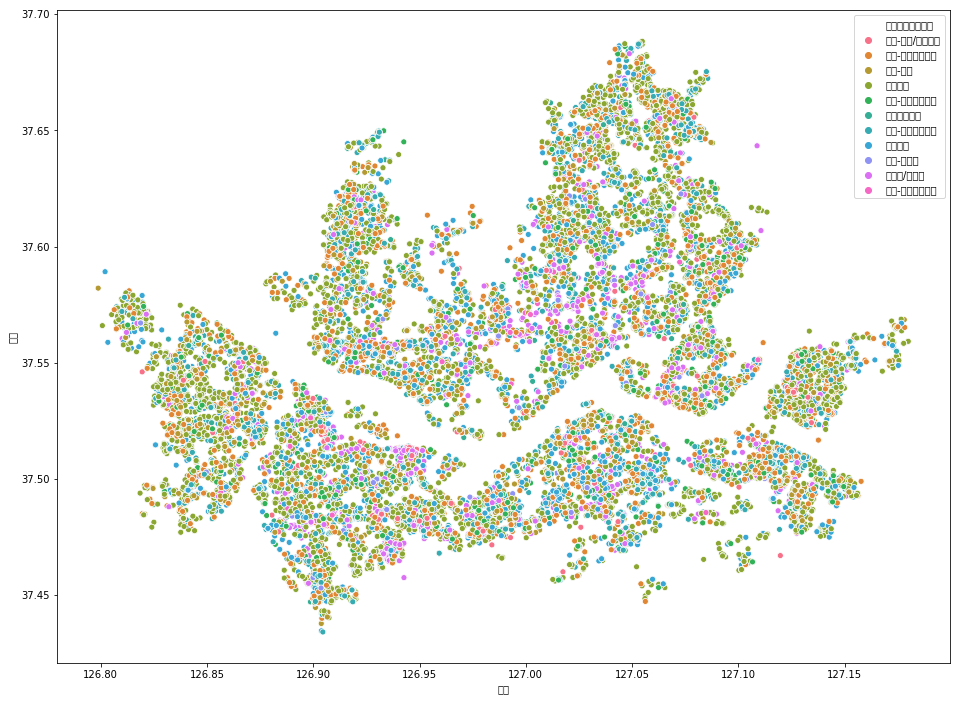

In [53]:
plt.figure(figsize=(16, 12))
sns.scatterplot(data=shop_seoul_edu, x='경도', y='위도', hue='상권업종중분류명')

In [54]:
shop_seoul_realty = shop_seoul[shop_seoul['상권업종대분류명'] == '부동산']

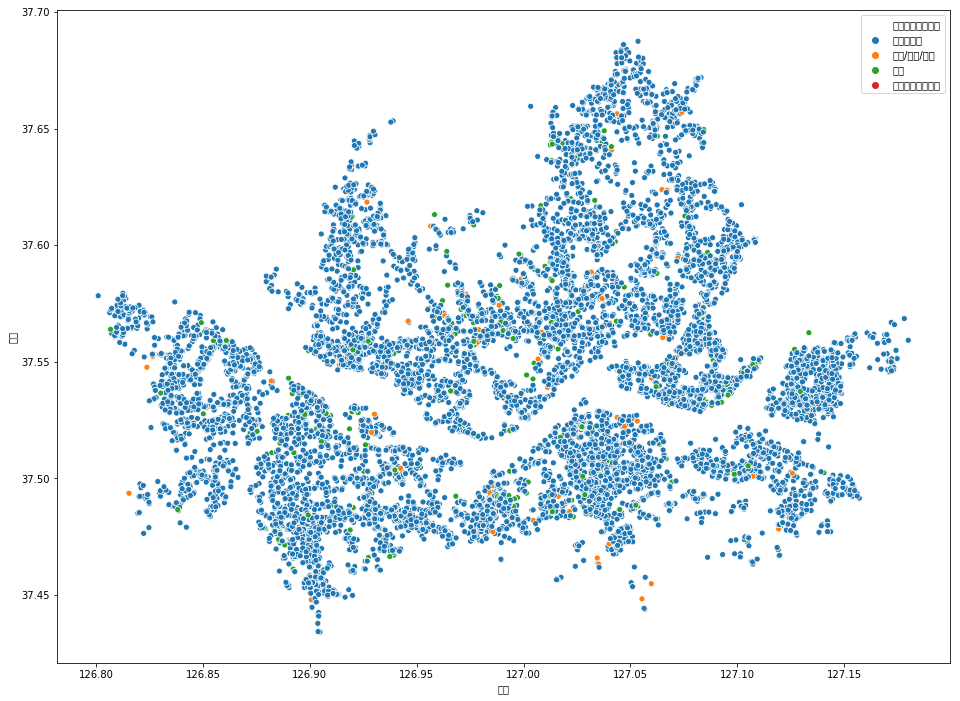

In [55]:
plt.figure(figsize=(16, 12))
sns.scatterplot(data=shop_seoul_realty, x='경도', y='위도', hue='상권업종중분류명')

In [56]:
shop_seoul_edu_computer = shop_seoul.loc[shop_seoul['상권업종중분류명'] == '학원-컴퓨터']

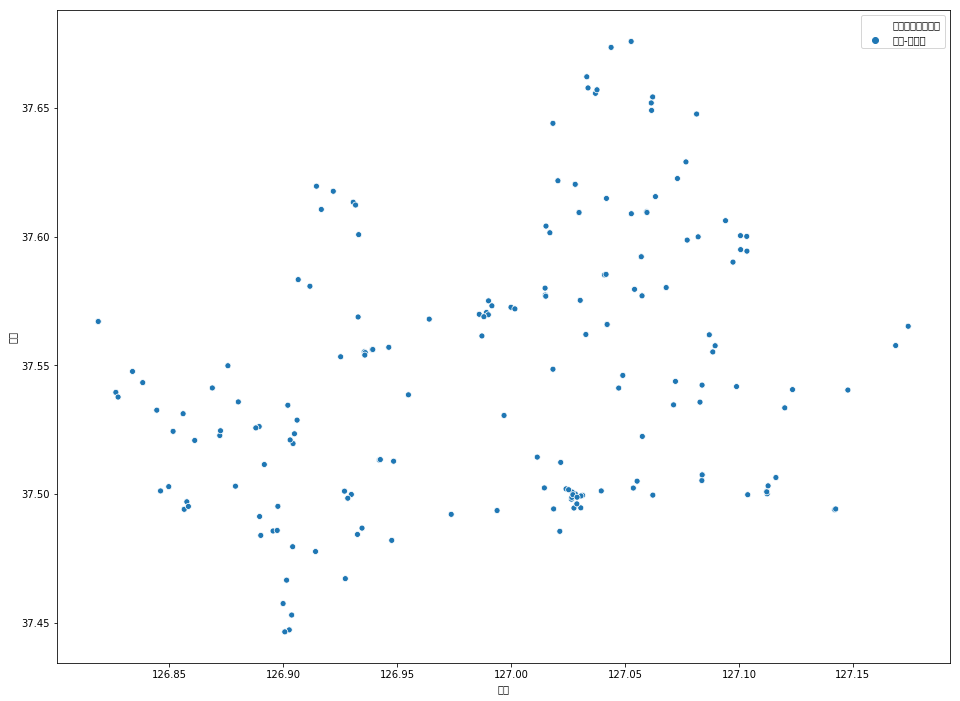

In [57]:
plt.figure(figsize=(16, 12))
sns.scatterplot(data=shop_seoul_edu_computer, x='경도', y='위도', hue='상권업종중분류명', 
                alpha='auto')

In [59]:
!pip install folium

In [60]:
import folium

def show_marker_map(geo_df):
    map = folium.Map(location=[geo_df['위도'].mean(), geo_df['경도'].mean()], 
                     zoom_start=12, tiles='Stamen Terrain')

    for n in geo_df.index:
        shop_name = geo_df.loc[n, '상호명'] + ' - ' + geo_df.loc[n, '지번주소']
        folium.Marker([geo_df.loc[n, '위도'], 
                       geo_df.loc[n, '경도']], 
                      popup=shop_name).add_to(map)

    return map

In [61]:
show_marker_map(shop_seoul_edu_computer)

In [62]:
shop_seoul_eat = shop_seoul[shop_seoul['상권업종중분류명'] == '커피점/카페']

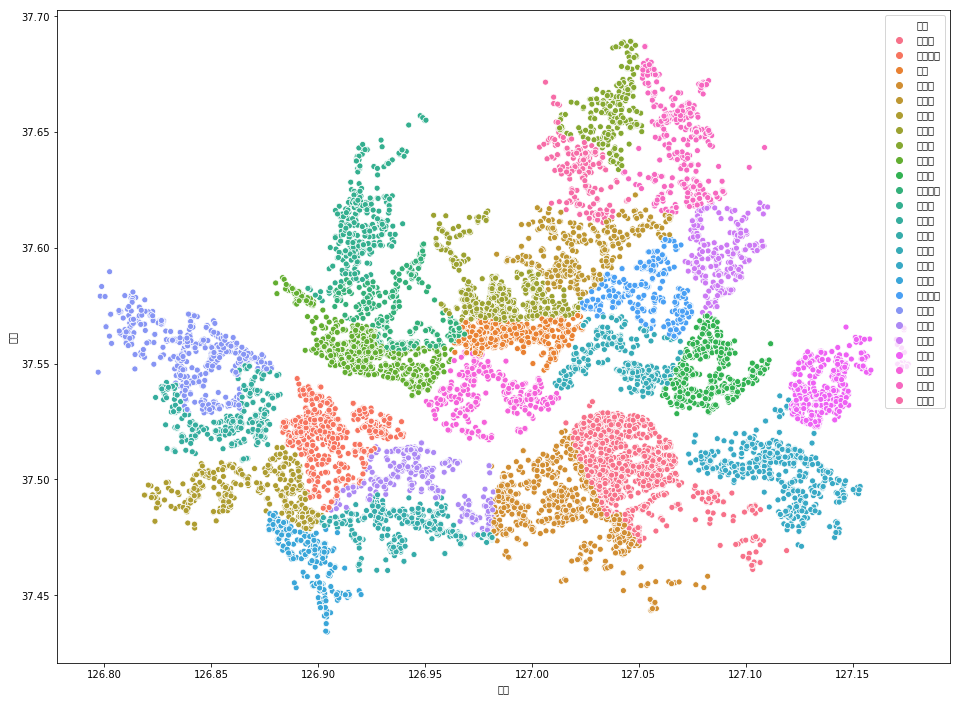

In [63]:
plt.figure(figsize=(16, 12))
sns.scatterplot(data=shop_seoul_eat, x='경도', y='위도', hue='구군', 
                alpha='auto')

In [64]:
shop_seoul_eat.shape

(14906, 15)

In [66]:
geo_df = shop_seoul_eat[shop_seoul_eat["구군"] == "중구"]

map = folium.Map(location=[geo_df['위도'].mean(), 
                           geo_df['경도'].mean()], 
                 zoom_start=16, tiles='Stamen Terrain')

for n in geo_df.index:
    shop_name = geo_df.loc[n, '상호명'] + ' - ' + geo_df.loc[n, '지번주소']
    folium.Marker([geo_df.loc[n, '위도'], geo_df.loc[n, '경도']], 
                  popup=shop_name).add_to(map)

map

In [68]:
shop_except_seoul = shop1.loc[~shop1['지번주소'].str.startswith('서울')]

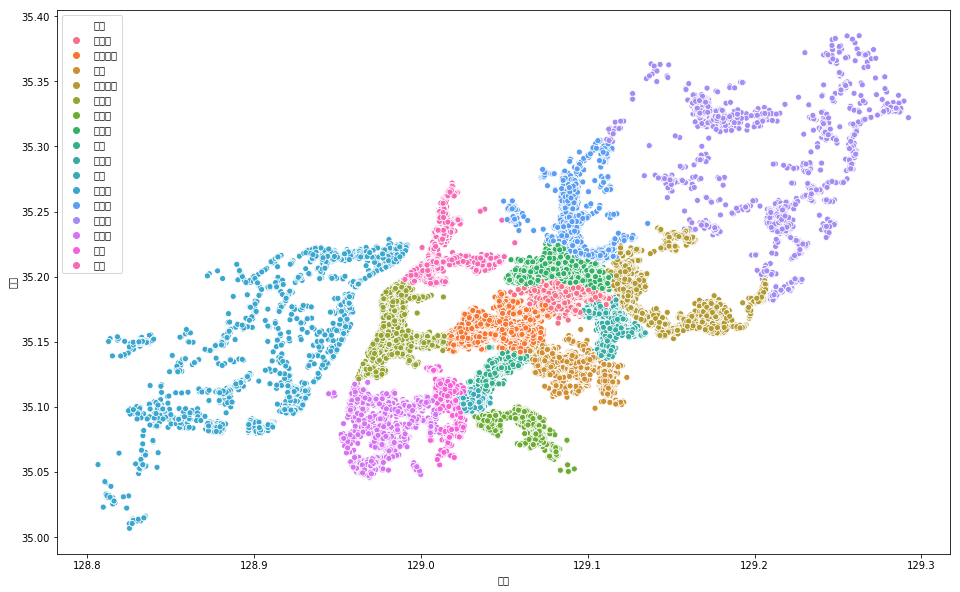

In [69]:
plt.figure(figsize=(16, 10))
sns.scatterplot(data=shop_except_seoul, x='경도', y='위도', hue='구군', 
                alpha='auto')